In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
benign_df = pd.read_csv('1.benign.csv')
g_c_df = pd.read_csv('1.gafgyt.combo.csv')
g_j_df = pd.read_csv('1.gafgyt.junk.csv')
g_s_df = pd.read_csv('1.gafgyt.scan.csv')
g_t_df = pd.read_csv('1.gafgyt.tcp.csv')
g_u_df = pd.read_csv('1.gafgyt.udp.csv')
m_a_df = pd.read_csv('1.mirai.ack.csv')
m_sc_df = pd.read_csv('1.mirai.scan.csv')
m_sy_df = pd.read_csv('1.mirai.syn.csv')
m_u_df = pd.read_csv('1.mirai.udp.csv')
m_u_p_df = pd.read_csv('1.mirai.udpplain.csv')

# Data Preprocess

In [ ]:
dfs = {
    'benign':benign_df,
    'm_u':m_u_df,
    'g_c':g_c_df,
    'g_j':g_j_df,
    'g_s':g_s_df,
    'g_t':g_t_df,
    'g_u':g_u_df,
    'm_a':m_a_df,
    'm_sc':m_sc_df,
    'm_sy':m_sy_df,
    'm_u_p':m_u_p_df
}

In [ ]:
# One-hot

for name, df in dfs.items():
  for target in dfs.keys():
    df[target] = 1 if name == target else 0

In [ ]:
df = pd.concat(dfs.values(), ignore_index=True)

In [ ]:
X = df[df.columns[:115]]
Y = df[df.columns[115:]]

# Decision Tree

## All Features

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9998232348031032
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9951
           1       1.00      1.00      1.00     47592
           2       1.00      1.00      1.00     11886
           3       1.00      1.00      1.00      5811
           4       1.00      1.00      1.00      6101
           5       1.00      1.00      1.00     18128
           6       1.00      1.00      1.00     21383
           7       1.00      1.00      1.00     20456
           8       1.00      1.00      1.00     21517
           9       1.00      1.00      1.00     24711
          10       1.00      1.00      1.00     16124

   micro avg       1.00      1.00      1.00    203660
   macro avg       1.00      1.00      1.00    203660
weighted avg       1.00      1.00      1.00    203660
 samples avg       1.00      1.00      1.00    203660



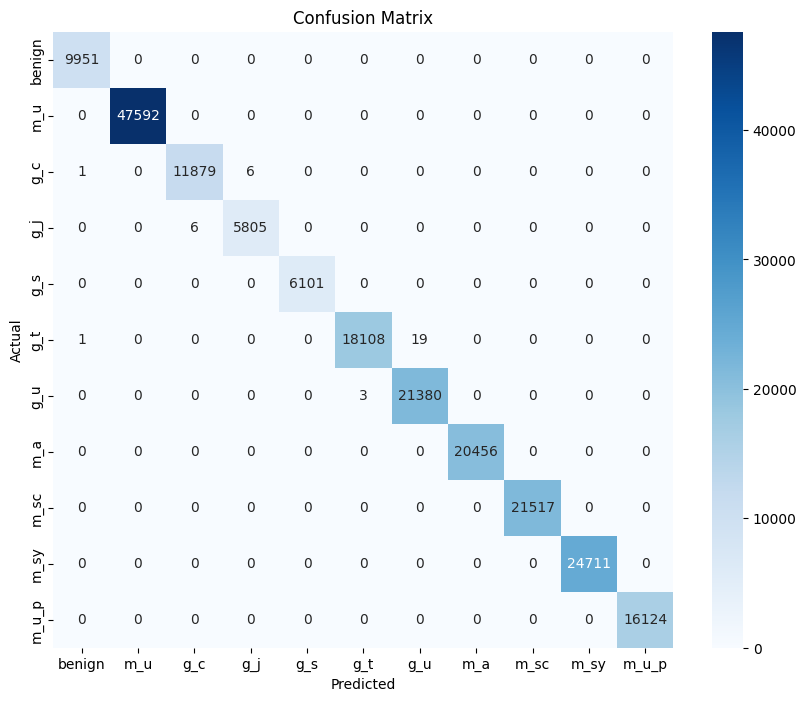

In [ ]:
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

labels = list(dfs.keys())
cm = confusion_matrix(Y_test_labels, Y_pred_labels, labels=range(len(labels)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
non_zero_feature_importances = feature_importances[feature_importances > 0].sort_values(ascending=False)
print(non_zero_feature_importances)

H_L0.01_mean             0.561462
MI_dir_L0.01_mean        0.231650
HH_jit_L0.1_mean         0.110190
MI_dir_L0.1_weight       0.057760
MI_dir_L0.01_variance    0.012774
H_L0.01_variance         0.007176
MI_dir_L0.01_weight      0.004405
MI_dir_L0.1_mean         0.004235
H_L1_weight              0.002549
H_L0.01_weight           0.001771
HH_L0.01_std             0.001248
H_L1_mean                0.000868
H_L0.1_variance          0.000784
HH_jit_L3_variance       0.000784
HH_L3_std                0.000583
H_L3_weight              0.000471
HH_L1_weight             0.000296
HH_L0.1_std              0.000171
HH_L5_std                0.000164
HH_jit_L5_mean           0.000117
HH_jit_L0.1_weight       0.000081
H_L3_variance            0.000072
HH_jit_L0.01_variance    0.000064
HH_L3_radius             0.000053
HH_L0.1_weight           0.000041
HH_jit_L1_weight         0.000039
HH_jit_L3_mean           0.000031
HH_L0.01_pcc             0.000023
HpHp_L3_weight           0.000022
HpHp_L0.01_mea

## Top 3 Features

In [ ]:
top_3 = non_zero_feature_importances[:3].index.tolist()
X_top3 = df[top_3]
X_top3_train, X_top3_test, Y_top3_train, Y_top3_test = train_test_split(X_top3, Y, test_size=0.2, random_state=42)
clf_top3 = DecisionTreeClassifier(random_state=42)
clf_top3.fit(X_top3_train, Y_train)
Y_pred_top3 = clf_top3.predict(X_top3_test)
print(top_3)
print(accuracy_score(Y_test, Y_pred_top3))
print(classification_report(Y_test, Y_pred_top3))

['H_L0.01_mean', 'MI_dir_L0.01_mean', 'HH_jit_L0.1_mean']
0.9991112638711578
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9951
           1       1.00      1.00      1.00     47592
           2       0.99      0.99      0.99     11886
           3       0.99      0.99      0.99      5811
           4       1.00      1.00      1.00      6101
           5       1.00      1.00      1.00     18128
           6       1.00      1.00      1.00     21383
           7       1.00      1.00      1.00     20456
           8       1.00      1.00      1.00     21517
           9       1.00      1.00      1.00     24711
          10       1.00      1.00      1.00     16124

   micro avg       1.00      1.00      1.00    203660
   macro avg       1.00      1.00      1.00    203660
weighted avg       1.00      1.00      1.00    203660
 samples avg       1.00      1.00      1.00    203660



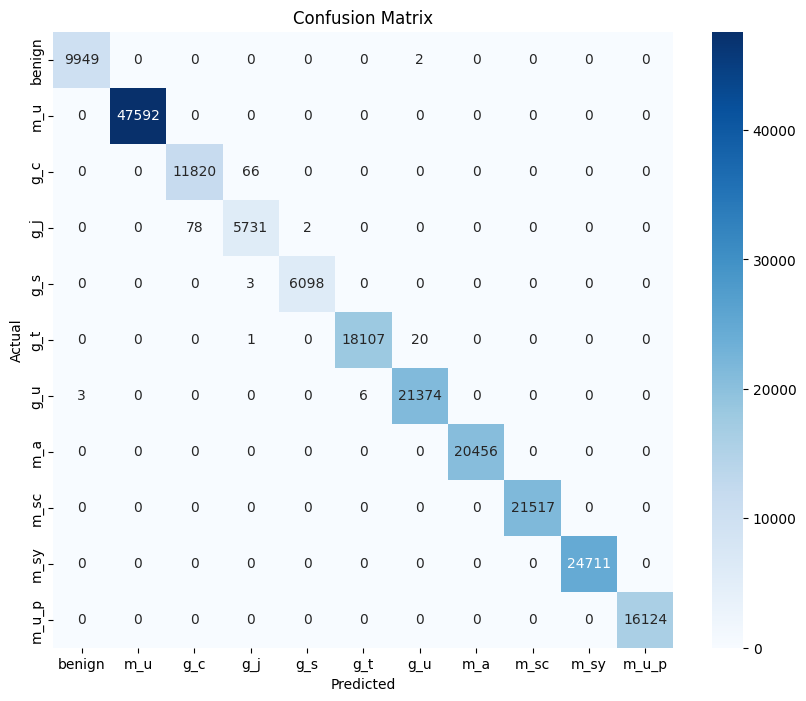

In [ ]:
Y_pred_top3_labels = np.argmax(Y_pred_top3, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

labels = list(dfs.keys())
cm = confusion_matrix(Y_test_labels, Y_pred_top3_labels, labels=range(len(labels)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Bottom 3 Features

In [ ]:
last_3 = non_zero_feature_importances[-3:].index.tolist()
X_last3 = df[last_3]
X_last3_train, X_last3_test, Y_train, Y_test = train_test_split(X_last3, Y, test_size=0.2, random_state=42)
clf_last3 = DecisionTreeClassifier(random_state=42)
clf_last3.fit(X_last3_train, Y_train)
Y_pred_last3 = clf_last3.predict(X_last3_test)
print(last_3)
print(accuracy_score(Y_test, Y_pred_last3))
print(classification_report(Y_test, Y_pred_last3))

['HH_jit_L0.01_weight', 'HH_L5_weight', 'HpHp_L1_mean']
0.5030295590690367
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9951
           1       0.99      0.65      0.78     47592
           2       0.94      0.94      0.94     11886
           3       0.89      0.88      0.88      5811
           4       0.99      0.99      0.99      6101
           5       0.13      0.00      0.00     18128
           6       0.23      0.00      0.00     21383
           7       1.00      0.66      0.79     20456
           8       0.40      0.00      0.00     21517
           9       0.99      0.69      0.82     24711
          10       0.97      0.54      0.69     16124

   micro avg       0.98      0.50      0.66    203660
   macro avg       0.78      0.58      0.63    203660
weighted avg       0.77      0.50      0.58    203660
 samples avg       0.50      0.50      0.50    203660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


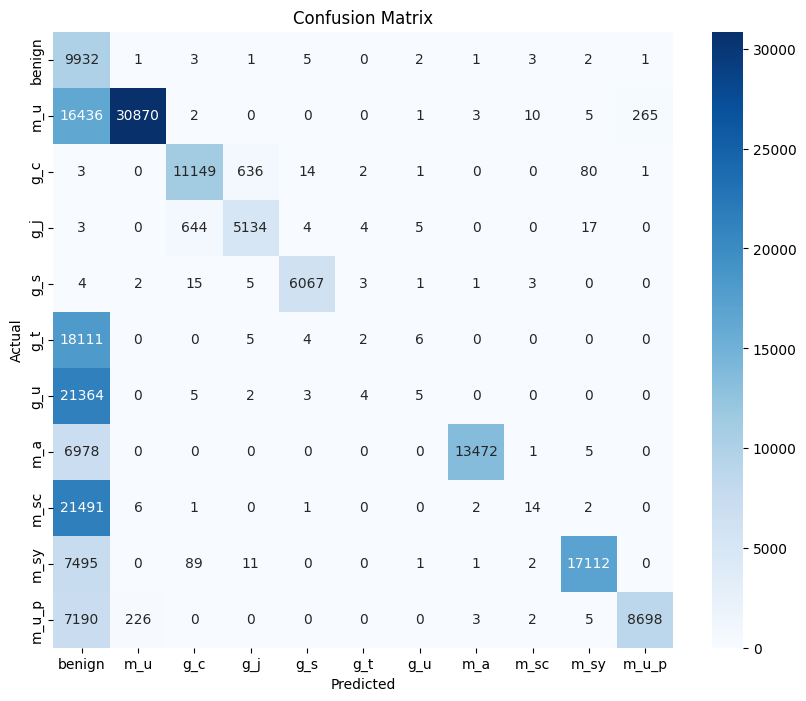

In [ ]:
Y_pred_last3_labels = np.argmax(Y_pred_last3, axis=1)

labels = list(dfs.keys())
cm = confusion_matrix(Y_test_labels, Y_pred_last3_labels, labels=range(len(labels)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()